In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

##### File path of conceptual geomodel realizations.

In [2]:
# These conceptual models are simulated with object-based 
# or process-mimicking method in Petrel platform. The conceptual geomodels are exported from Petrel directly 
# as model properties (with Gslib format). The exported file contains a number of conceptual geomodels. 
# In our case:  code 3 is for background mud faceis, 0 for lobe facies, and 4 for channel facies. 

concptpath = '/scratch/users/suihong/GANSimData/Petrel_exported_concpt' 


##### Remove header information, convert into matrix, and convert from float into int data format.

In [28]:
rlz_no     = 4    # The number of exported conceptual geomodel realizations
con_x_size = 400  # Cell number along x direction in the conceptual geomodels
con_y_size = 400  # Cell number along y direction in the conceptual geomodels
con_z_size = 50   # Cell number along z direction in the conceptual geomodels

concpts = np.zeros((con_x_size * con_y_size * con_z_size, rlz_no), np.int8)
with open (concptpath) as fl:
    i = -1
    for line in fl:
        eles = line.strip().split(' ')  
        if len(eles)>=4:            
            i = i + 1  
            concpts[i] = np.array(eles, dtype=np.float32).astype(np.int8)[3:]

concpts = concpts.reshape(con_z_size, con_x_size, con_y_size, rlz_no)[::-1,::-1].transpose(3, 1, 2, 0)
concpts = np.where(concpts == 0, 5, concpts)-3 # exchange code of levee and channels, may remove according to user's case

print(concpts.dtype)
print(concpts.shape)

int8
(4, 400, 400, 50)


Text(0.5, 1.0, 'Vertical Section')

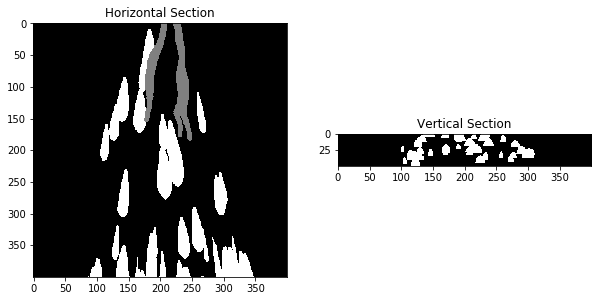

In [30]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5, forward=True)
ax[0].imshow(concpts[2, :, :, 20], cmap='gray')
ax[0].set_title('Horizontal Section')
ax[1].imshow(concpts[0, -200, :, :].transpose(1, 0), cmap='gray')
ax[1].set_title('Vertical Section')

##### Save organized conceptual geomodels for further use

In [32]:
concpts_int8_save = concpts.reshape(rlz_no, -1).transpose(1,0)  # shape of [-1, 400]

concpts_all_int8_fname = '/scratch/users/suihong/GANSimData//concpts_int8'
np.save(concpts_all_int8_fname, concpts_int8_save)   # , fmt='%i '*400  , newline='\n'

##### Import the saved file for test

In [35]:
rlz_no = 4
con_x_size = 400
con_y_size = 400
con_z_size = 50

In [36]:
concpts_int8_load = np.load('/scratch/users/suihong/GANSimData//concpts_int8.npy')
print(concpts_int8_load.shape)

concpts_int8_load_4D = concpts_int8_load.transpose(1,0).reshape(rlz_no, con_x_size, con_y_size, con_z_size)
print(concpts_int8_load_4D.shape)

(8000000, 4)
(4, 400, 400, 50)


Text(0.5, 1.0, 'Vertical Section')

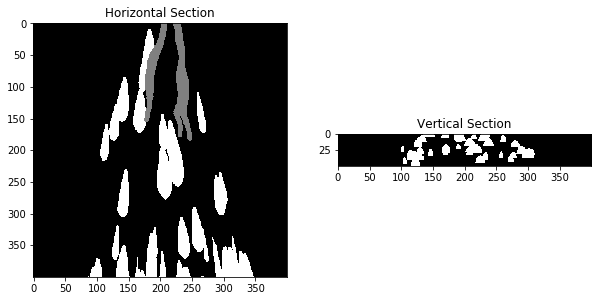

In [37]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5, forward=True)
ax[0].imshow(concpts_int8_load_4D[2, :, :, 20], cmap='gray')
ax[0].set_title('Horizontal Section')
ax[1].imshow(concpts_int8_load_4D[0, -200, :, :].transpose(1, 0), cmap='gray')
ax[1].set_title('Vertical Section')